In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Dependencies
import requests
import json  
# Base URL for GET requests to retrieve number/date facts
url = "http://ergast.com/api/f1/YEARS/driverStandings.json"

question = "Enter the year between 1950 and 2020 and system will display the F1 winner details of that year?"
whichYear="11"
while whichYear != "":
    whichYear = input(question)
    if whichYear != "":
        replaceURL = url.replace("YEARS", whichYear)
        try:
            response = requests.get(replaceURL).json()
            x = response["MRData"]["StandingsTable"]["StandingsLists"][0]["DriverStandings"][0]
            winnerName = x["Driver"]["givenName"] + " " + x["Driver"]["familyName"]
            wins = x["wins"]
            points = x["points"]
            dob = x["Driver"]["dateOfBirth"]
            nationality = x["Driver"]["nationality"]
            team = x['Constructors'][0]['name']
            teamNationality = x['Constructors'][0]["nationality"]
            print(f"Winner: {winnerName} , Date of Birth: {dob} , Nationality: {nationality}")
            print(f"Number of Win(s): {wins}")
            print(f"Number of Point(s): {points}")
            print(f"Team: {team} , Team Nationality: {teamNationality}")
            print("")
        except:    
            print("You have entered the wrong year. It must be between 1950 and 2020, please re-enter") 



In [3]:
df = pd.read_csv("results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24960 entries, 0 to 24959
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         24960 non-null  int64  
 1   raceId           24960 non-null  int64  
 2   driverId         24960 non-null  int64  
 3   constructorId    24960 non-null  int64  
 4   number           24960 non-null  object 
 5   grid             24960 non-null  int64  
 6   position         24960 non-null  object 
 7   positionText     24960 non-null  object 
 8   positionOrder    24960 non-null  int64  
 9   points           24960 non-null  float64
 10  laps             24960 non-null  int64  
 11  time             24960 non-null  object 
 12  milliseconds     24960 non-null  object 
 13  fastestLap       24960 non-null  object 
 14  rank             24960 non-null  object 
 15  fastestLapTime   24960 non-null  object 
 16  fastestLapSpeed  24960 non-null  object 
 17  statusId    

Correlation coefficient=0.8387483963314278
y = 0.32x + 4.7


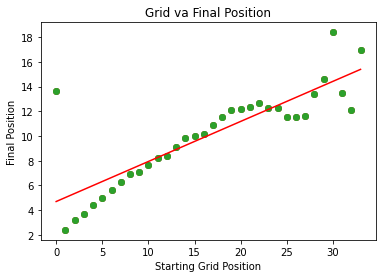

In [14]:
y = df.loc[df.position != '\\N']
y["position"] = y.position.astype(float)
x = y.groupby("grid")
x_values = x.grid.mean()
y_values = x.position.mean()
plt.xlabel("Starting Grid Position")
plt.ylabel("Final Position")
plt.title("Grid va Final Position")
plt.scatter(x_values,y_values)
from scipy.stats import linregress
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue}")
#print(correlation[0],2)
print(line_eq)

plt.show()

1.0


<Figure size 432x288 with 0 Axes>

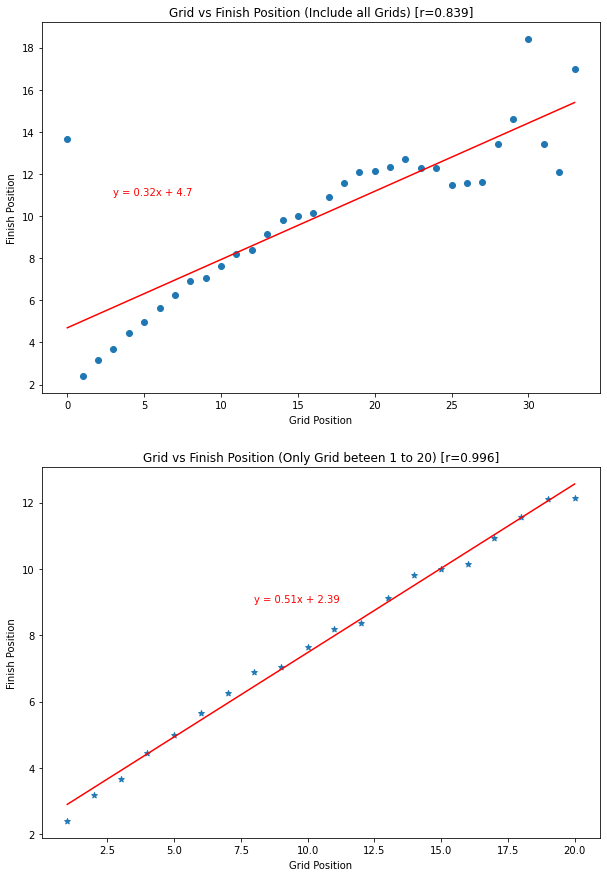

In [27]:
# Prepare data for the scatter plot of all Grids data
# removes all the '\n' position records
cleandf = df.loc[df.position != '\\N']
# cast the position to float so future numeric calculation is possible 
cleandf["position"] = cleandf.position.astype(float)
# Data is Group by the grid column 
byGrid = cleandf.groupby("grid")
# x value will be the mean of all grids
x_values = byGrid.grid.mean()
# y value will be the mean od all positions
y_values = byGrid.position.mean()

# Prepare data for the scatter plot for Grids data that falls between 1 and 20 and exclude the rest
# removes all 0 grid and those that are greater 20
cleandf2 = cleandf.loc[(cleandf.grid >= 1) & (cleandf.grid <= 20)]
byGrid1 = cleandf2.groupby("grid")
x_values1 = byGrid1.grid.mean()
y_values1 = byGrid1.position.mean()

f = plt.figure()    
f, axes = plt.subplots(2, figsize=(10,15))

from scipy.stats import linregress

# Calculate r for all grid data
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the first scatter plot with the linear regress line
sc = axes[0].scatter(x_values, y_values, marker = "o")
axes[0].plot(x_values,regress_values,"r-")
axes[0].annotate(line_eq,(3,11),fontsize=10,color="red")
axes[0].set_xlabel('Grid Position', labelpad = 5)
axes[0].set_ylabel('Finish Position', labelpad = 5)
axes[0].set_title(f"Grid vs Finish Position (Include all Grids) [r={format(rvalue,'.3f')}]")

# Calculate r for Grids data that falls between 1 and 20
correlation1 = st.pearsonr(x_values1,y_values1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the second scatter plot with the linear regress line underneath the first one
sc = axes[1].scatter(x_values1, y_values1, marker = "*")
axes[1].plot(x_values1,regress_values1,"r-")
axes[1].annotate(line_eq,(8,9),fontsize=10,color="red")
axes[1].set_xlabel('Grid Position', labelpad = 5)
axes[1].set_ylabel('Finish Position', labelpad = 5)
axes[1].set_title(f"Grid vs Finish Position (Only Grid beteen 1 to 20) [r={format(rvalue,'.3f')}]")

plt.show


print(round(rvalue,2))


In [30]:
pitStopdf = pd.read_csv("pit_stops.csv")
pitStopdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8030 non-null   int64 
 1   driverId      8030 non-null   int64 
 2   stop          8030 non-null   int64 
 3   lap           8030 non-null   int64 
 4   time          8030 non-null   object
 5   duration      8030 non-null   object
 6   milliseconds  8030 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 439.3+ KB


In [32]:
#constructor_results,constructor_standings and constructors on
conResult = pd.read_csv("constructor_results.csv") 
cons = pd.read_csv("constructors.csv") 
conStanding = pd.read_csv("constructor_standings.csv")
conResult

first = pd.merge(cons, conResult, how="inner", on=["constructorId", "constructorId"],suffixes=('_constructor','_constructor_results'))
first.info()
all = pd.merge(first, conStanding, how="inner", left_on=['constructorId','raceId'], right_on = ['constructorId','raceId'],suffixes=('_first','_constructor_standing'))
all
#conStanding.info()
#all
#conStanding.raceId.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11730 entries, 0 to 11729
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorId         11730 non-null  int64  
 1   constructorRef        11730 non-null  object 
 2   name                  11730 non-null  object 
 3   nationality           11730 non-null  object 
 4   url                   11730 non-null  object 
 5   constructorResultsId  11730 non-null  int64  
 6   raceId                11730 non-null  int64  
 7   points                11730 non-null  float64
 8   status                11730 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 916.4+ KB


,constructorId,constructorRef,name,nationality,url,constructorResultsId,raceId,points_first,status,constructorStandingsId,points_constructor_standing,position,positionText,wins
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,\N,1,14.0,1,1,1
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,14,19,10.0,\N,7,24.0,1,1,1
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,25,20,4.0,\N,18,28.0,3,3,1
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,35,21,6.0,\N,29,34.0,3,3,1
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,46,22,8.0,\N,40,42.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11588,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,16182,1043,12.0,\N,27617,89.0,7,7,1
11589,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,16196,1044,0.0,\N,27627,89.0,7,7,1
11590,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,16203,1045,8.0,\N,27637,97.0,7,7,1
11591,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,16214,1046,6.0,\N,27647,103.0,7,7,1
